Alireza Dehghanpour

student number : 98101555

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading dataset and splitting

In [157]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("data.csv", index_col=0)
training_data, testing_data = train_test_split(dataset, test_size=0.5, random_state = 0)
dataset

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1
...,...,...,...
195,-0.405730,0.781775,-1
196,0.319356,0.460903,-1
197,0.228630,0.445138,-1
198,1.484537,-1.079805,1


plot data

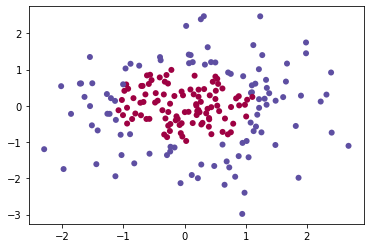

In [158]:
plt.scatter(x=dataset['X1'], y=dataset['X2'], c=dataset['Y'], edgecolor='none',
            alpha=1, cmap=plt.cm.get_cmap('Spectral', 10))

give weight 1/m to each data

In [159]:
training_data['weight'] = 1/len(training_data)
training_data

,X1,X2,Y,weight
158,-0.965066,1.028274,1,0.01
191,-0.339140,0.312170,-1,0.01
50,-0.922909,0.469751,-1,0.01
0,0.004291,-0.174600,-1,0.01
94,-1.225836,-0.221793,1,0.01
...,...,...,...,...
67,0.842225,0.203581,-1,0.01
192,0.653662,-2.176609,1,0.01
117,1.674076,1.163724,1,0.01
47,1.308473,0.195013,1,0.01


calculate error for each sample

In [160]:
def cal_error(row):
  err = 0
  if row['pred'] != row['Y']:
    err = row['weight']
  return err


implementing AdaBoost algorithm

In [161]:
# we give weight to decision tree as sample_weight parameter

from sklearn.tree import DecisionTreeClassifier

T = 20
classifiers = []
for i in range(T):
  dt = DecisionTreeClassifier(criterion = "gini",max_depth=1)
  dt.fit(training_data.drop(['Y','weight'],axis=1).values,training_data['Y'].values, sample_weight = training_data['weight'])
  y_pred = dt.predict(training_data.drop(['Y','weight'],axis=1).values)
  training_data['pred'] = y_pred
  err = sum(training_data.apply(cal_error, axis=1))
  alpha = 0.5*np.log((1-err)/err)
  Zt = 2.0 * np.sqrt(err*(1-err))
  training_data['weight'] = np.true_divide(training_data['weight']*np.exp(-1*alpha*training_data['Y']*training_data['pred']),Zt)
  classifiers.append((alpha,dt))
  training_data.drop(['pred'],axis=1,inplace=True)

predict target for test dataset

In [162]:
def predict(row):
  t = 0
  for alpha, h in classifiers:
    t+= alpha*h.predict(row.to_numpy().reshape(1,-1))[0]
  return np.sign(t)
test_pred = testing_data.drop(['Y'],axis=1).apply(predict,axis=1)

calculate accuracy

In [163]:
from sklearn.metrics import accuracy_score
print("accuracy on test dataset : ",accuracy_score(test_pred,testing_data['Y']))

accuracy on test dataset :  0.94
